In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!cd

C:\Users\Nitesh\Desktop\DS


In [2]:
housing = pd.read_csv('C://Users/Nitesh/Desktop/DS/Datasets/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


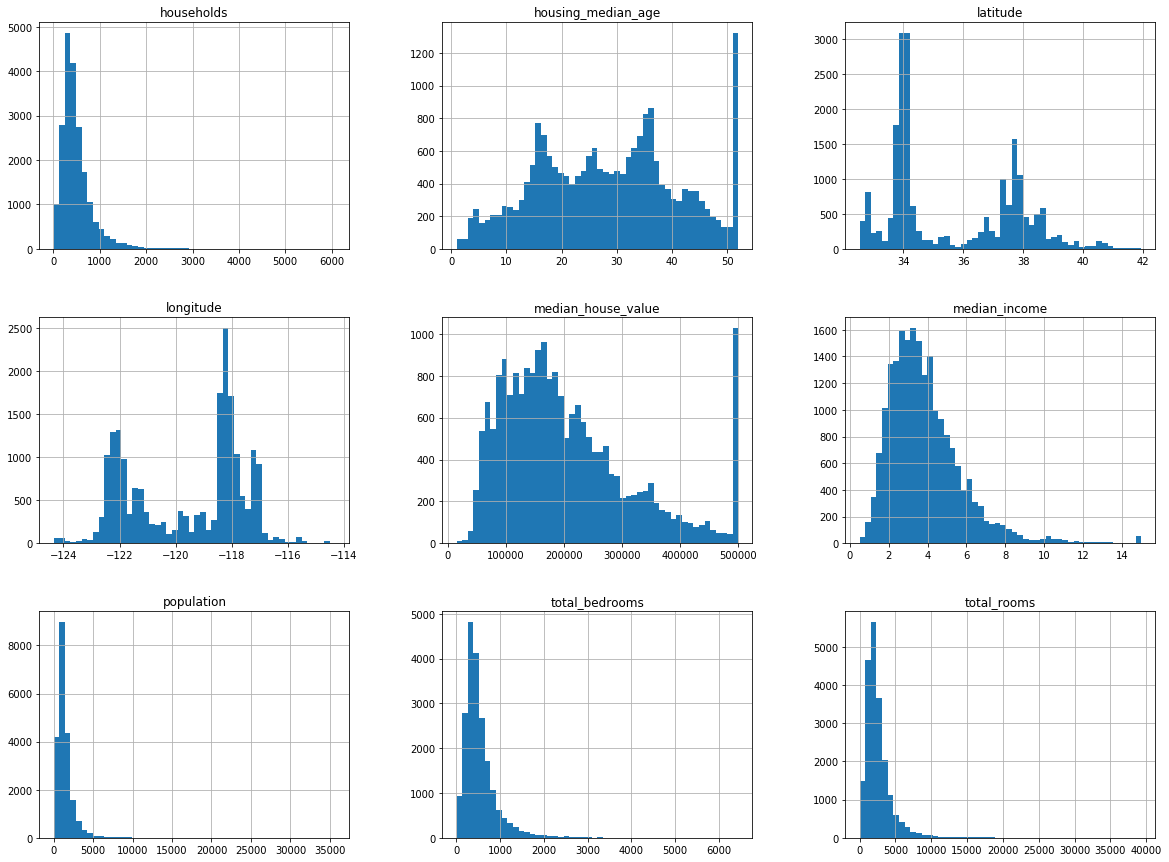

In [5]:
housing.hist(figsize=(20,15), bins=50)
plt.show()

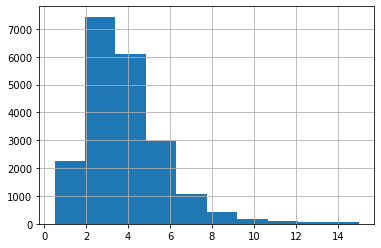

In [34]:
housing['median_income'].hist()
plt.show()

In [3]:
# dividing the 1.5 to limit the number of income categories
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

# labelling everything above 5 as 5
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)

In [36]:
housing.income_cat.value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

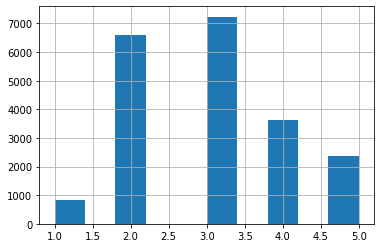

In [37]:
housing['income_cat'].hist()
plt.show()

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_idx, test_idx in split.split(housing, housing['income_cat']): 
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [39]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [40]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [41]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [5]:
# lets also look at random shuffle split
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing, test_size=0.2 , random_state=29)

In [7]:
def income_category_proportions(data):
    return data['income_cat'].value_counts() / len(data)

compare_props= pd.DataFrame({
    "overall":income_category_proportions(housing),
    "random":income_category_proportions(strat_train_set),
    "stratified":income_category_proportions(train_set)
    
}).sort_index()

compare_props['rand. % err'] = 100 * compare_props['random']/compare_props['overall'] - 100
compare_props['strat. % err'] = 100 * compare_props['stratified']/compare_props['overall'] - 100

compare_props

,overall,random,stratified,rand. % err,strat. % err
1.0,0.039826,0.039850,0.039123,0.060827,-1.763990
2.0,0.318847,0.318859,0.320676,0.003799,0.573621
3.0,0.350581,0.350594,0.352047,0.003455,0.418049
4.0,0.176308,0.176296,0.174964,-0.006870,-0.762572
5.0,0.114438,0.114402,0.113190,-0.031753,-1.090178


In [8]:
for item_set in (strat_test_set,strat_train_set):
    item_set.drop('income_cat', axis=1,inplace=True)


# Visualizing the data

In [9]:
housing = strat_train_set.copy()

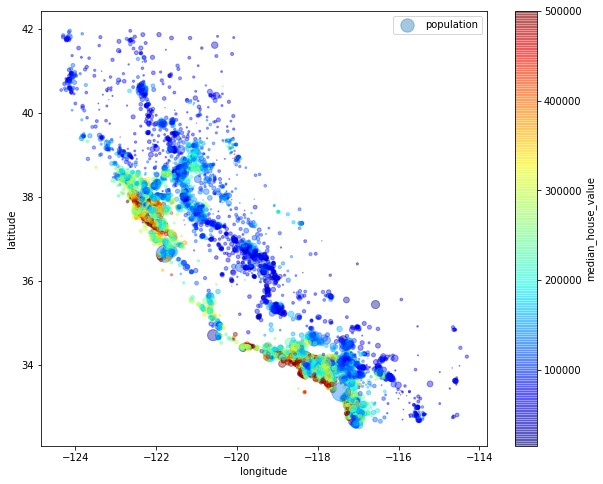

In [43]:
# 'c' is for adding coclor, 's' is for adding circles; the value of 's' represents the radius of the circle

c


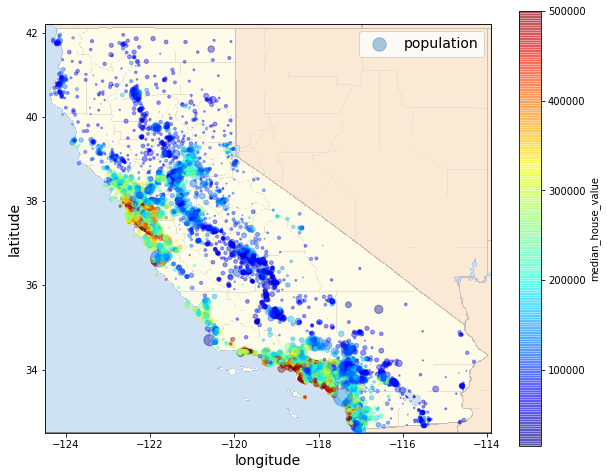

In [10]:
import matplotlib.image as mpimg

ax = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100,
            label='population', c='median_house_value', cmap='jet', colorbar=True, figsize=(10,8), sharex=False)

california_img = mpimg.imread('C:/Users/Nitesh/Desktop/DS/images/California_Locator_Map.png')
plt.imshow(california_img, extent=[-124.5,-113.9, 32.5, 42.2], alpha=0.5, cmap=plt.get_cmap('jet'))

plt.xlabel('longitude', fontsize=14)
plt.ylabel('latitude', fontsize=14)

plt.legend(fontsize=14)
plt.show()

# Looking for Correlations
(Using pandas Pearson Correlation theory)

In [11]:
corr_matrix =housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

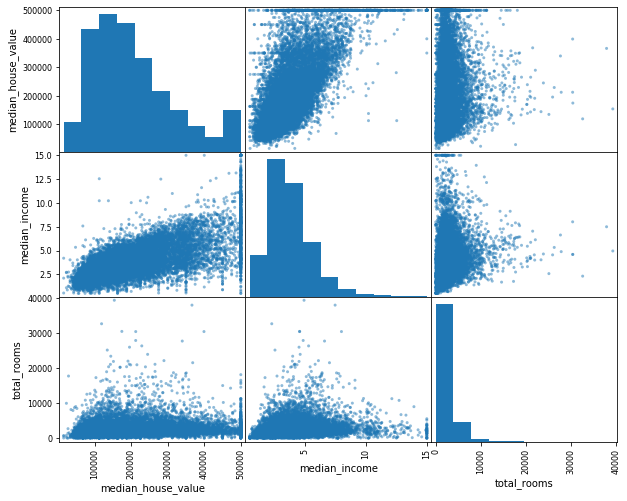

In [12]:
imp_attributes=['median_house_value','median_income','total_rooms']

from pandas.plotting import scatter_matrix
scatter_matrix(housing[imp_attributes], figsize=(10,8))
plt.show()

[0, 14, 0, 550000]

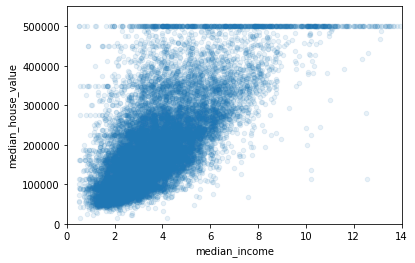

In [13]:

housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.axis([0, 14, 0, 550000])

# Feature Engineering

In [14]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [17]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
7771,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,166200.0,<1H OCEAN,4.658879,0.210130,3.483645
9352,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834,500001.0,NEAR BAY,7.341826,0.135338,3.076433
18657,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777,263800.0,NEAR OCEAN,4.941714,0.239130,2.107429


In [15]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_room          -0.253572
Name: median_house_value, dtype: float64

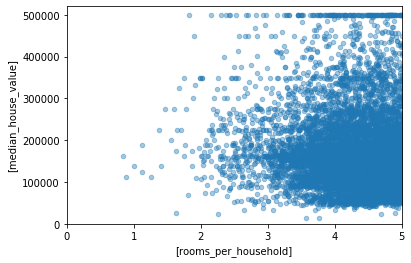

In [16]:
housing.plot(kind='scatter', x=['rooms_per_household'], y = ['median_house_value'], alpha=0.4)
plt.axis([0, 5, 0, 520000])
plt.show()

# Preparing the data with ML algos

In [17]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [63]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7771 to 20194
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16349 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


3 common ways of calculating averages in statistics

**mean** = summing up all items / total no of items
**median** = exact middle value when arranged in order
**mode** = most frequently occuring item

In [19]:
# when imputing your own logic of mean/median/mode
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

median_value = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median_value, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN


In [20]:
# levarging the Scikit Learn's SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
housing_num =housing.drop('ocean_proximity', axis=1) 
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [75]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [23]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [24]:
X = imputer.transform(housing_num)

In [40]:
X

array([[-1.1809e+02,  3.3920e+01,  3.5000e+01, ...,  1.4910e+03,
         4.2800e+02,  3.7383e+00],
       [-1.2257e+02,  3.7960e+01,  5.2000e+01, ...,  1.4490e+03,
         4.7100e+02,  9.1834e+00],
       [-1.2196e+02,  3.6970e+01,  2.3000e+01, ...,  1.8440e+03,
         8.7500e+02,  3.0777e+00],
       ...,
       [-1.2196e+02,  3.7340e+01,  3.6000e+01, ...,  3.7300e+02,
         1.6000e+02,  5.7910e+00],
       [-1.1977e+02,  3.6750e+01,  4.4000e+01, ...,  1.6800e+03,
         4.1800e+02,  1.7083e+00],
       [-1.1922e+02,  3.4260e+01,  1.6000e+01, ...,  1.4030e+03,
         5.6200e+02,  3.4018e+00]])

In [25]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [42]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [26]:
# cross checking for null values
housing_tr.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

#### handling categorical values

In [27]:
housing_cat= housing['ocean_proximity']
housing_cat.head(8)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [28]:
# using Pandas factorize() method
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:5]

array([0, 1, 2, 0, 3], dtype=int64)

In [46]:
housing_categories[:5]

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1, -1))

C:\Users\Nitesh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [52]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

# Custom Transformations

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

# grab columns indexes
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing doing here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)



In [35]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7771,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,<1H OCEAN
9352,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834,NEAR BAY
18657,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777,NEAR OCEAN
4873,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375,<1H OCEAN
12350,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399,INLAND


In [36]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [37]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housing.columns)+['rooms_per_household', 'population_per_household'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


# Setting up the Pipeline for all the data preprocessing¶


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

class DFSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_name):
        self.attribute_name = attribute_name
    
    def fit(self, X, y=None):
        return self # no training at all
    
    def transform(self, X, y=None):
        return X[self.attribute_name].values

In [40]:
num_attribs = list(housing_num.columns)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ("selector", DFSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DFSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

# Complete Pipeline


In [41]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [44]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

# Selecting & Training Models

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# trying the full pipeline on some instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [48]:
print("Prediction:", lin_reg.predict(some_data_prepared))
print("Actual Labels:", list(some_labels))

Prediction: [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual Labels: [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [49]:
from sklearn.metrics import mean_squared_error

housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [51]:
housing_pred = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("std:", scores.std())
    
display_scores(tree_rmse_scores)

scores: [70929.23508676 69417.22714759 67093.74276092 72515.14279951
 69196.18686719 69809.90214482 70536.5670298  71247.075456
 67585.43158555 70880.0222797 ]
mean: 69921.05331578362
std: 1582.4975404224729


#much worse than are our Linear Regression !!!!!!!

In [56]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse = np.sqrt(-lin_scores)

display_scores(lin_rmse)

scores: [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean: 68243.17261737355
std: 2500.726216291981


In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=29)
rf_reg.fit(housing_prepared, housing_labels)

C:\Users\Nitesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=29, verbose=0,
                      warm_start=False)

In [58]:
housing_pred = rf_reg.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels, housing_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

21989.607999546064

In [59]:
rf_scores = cross_val_score(rf_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

display_scores(np.sqrt(-rf_scores))

scores: [50727.85369442 53777.59672741 50196.9006331  52163.3145675
 51773.76520866 52548.65794101 51587.29054027 51131.27756361
 51084.53618231 55110.13075575]
mean: 52010.13238140342
std: 1408.6596990564344


# Fine Tuning our Model

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [61]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

63028.82855301561 {'max_features': 2, 'n_estimators': 3}
54311.17968554063 {'max_features': 2, 'n_estimators': 10}
52268.76500464661 {'max_features': 2, 'n_estimators': 30}
59417.41004206159 {'max_features': 4, 'n_estimators': 3}
51911.00063909374 {'max_features': 4, 'n_estimators': 10}
49801.51682778229 {'max_features': 4, 'n_estimators': 30}
58746.65501983766 {'max_features': 6, 'n_estimators': 3}
51441.798587493584 {'max_features': 6, 'n_estimators': 10}
49539.830545238154 {'max_features': 6, 'n_estimators': 30}
57936.43170178461 {'max_features': 8, 'n_estimators': 3}
51661.9753581149 {'max_features': 8, 'n_estimators': 10}
49471.83871463966 {'max_features': 8, 'n_estimators': 30}
61375.889813244175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53195.62677998769 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59104.58474344989 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51821.80586121349 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [64]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101138,0.007354,0.004798,7.477103e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.945131e+09,-3.951593e+09,-3.854654e+09,-3.770881e+09,-4.340921e+09,-3.972633e+09,1.956708e+08,18
1,0.304014,0.003247,0.011793,7.473725e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.957345e+09,-2.955775e+09,-2.956217e+09,-2.754268e+09,-3.124912e+09,-2.949704e+09,1.174927e+08,11
2,0.902246,0.007674,0.033380,4.899403e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.712084e+09,-2.669504e+09,-2.675103e+09,-2.694982e+09,-2.908472e+09,-2.732024e+09,8.949760e+07,9
3,0.144511,0.001623,0.004398,4.898820e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.566487e+09,-3.470813e+09,-3.522872e+09,-3.326980e+09,-3.764997e+09,-3.530429e+09,1.423476e+08,16
4,0.470313,0.003609,0.011793,3.998280e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.684127e+09,-2.703682e+09,-2.634800e+09,-2.625502e+09,-2.825650e+09,-2.694752e+09,7.171295e+07,8
5,1.414738,0.009610,0.033580,4.904470e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.519886e+09,-2.367199e+09,-2.404053e+09,-2.452185e+09,-2.657655e+09,-2.480191e+09,1.023870e+08,3
6,0.193081,0.002924,0.004198,3.997804e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.484876e+09,-3.120925e+09,-3.544949e+09,-3.400916e+09,-3.704271e+09,-3.451169e+09,1.926596e+08,14
7,0.639408,0.004163,0.011993,4.422006e-07,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.650827e+09,-2.507499e+09,-2.586286e+09,-2.647934e+09,-2.838789e+09,-2.646259e+09,1.094907e+08,5
8,1.937610,0.018335,0.034579,1.355376e-03,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.424768e+09,-2.327726e+09,-2.525234e+09,-2.437582e+09,-2.555711e+09,-2.454195e+09,8.060980e+07,2
9,0.246848,0.002527,0.004798,3.996611e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.286711e+09,-3.201487e+09,-3.415049e+09,-3.401953e+09,-3.478018e+09,-3.356630e+09,9.915941e+07,13


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

rf_reg1 = RandomForestRegressor(random_state=29)
rf_search = RandomizedSearchCV(rf_reg1, params_distribs, cv=5, scoring='neg_mean_squared_error', random_state=29, n_iter=10)

rf_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [68]:
cvres = rf_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

48554.82808753229 {'max_features': 2, 'n_estimators': 3}
49443.37797311243 {'max_features': 2, 'n_estimators': 10}
53570.23831992085 {'max_features': 2, 'n_estimators': 30}
50902.01282842812 {'max_features': 4, 'n_estimators': 3}
53580.16560373702 {'max_features': 4, 'n_estimators': 10}
48632.80337452587 {'max_features': 4, 'n_estimators': 30}
53454.896572172365 {'max_features': 6, 'n_estimators': 3}
48524.00649818885 {'max_features': 6, 'n_estimators': 10}
48560.27239481039 {'max_features': 6, 'n_estimators': 30}
53446.573293355774 {'max_features': 8, 'n_estimators': 3}


In [69]:
rf_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=149,
                      n_jobs=None, oob_score=False, random_state=29, verbose=0,
                      warm_start=False)

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.85759587e-02, 6.75828550e-02, 4.37017876e-02, 1.40481475e-02,
       1.33078040e-02, 1.46295775e-02, 1.36016163e-02, 3.68087726e-01,
       5.60669576e-02, 1.06071486e-01, 6.40949494e-02, 9.90524217e-03,
       1.55219551e-01, 1.80991564e-04, 1.80047582e-03, 3.12487308e-03])

In [71]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes))

[(0.0001809915635216116, 'ISLAND'),
 (0.0018004758153867411, 'NEAR BAY'),
 (0.003124873080284391, 'NEAR OCEAN'),
 (0.009905242170570712, '<1H OCEAN'),
 (0.013307804047458682, 'total_bedrooms'),
 (0.013601616261164901, 'households'),
 (0.01404814753605297, 'total_rooms'),
 (0.014629577499790526, 'population'),
 (0.04370178759264872, 'housing_median_age'),
 (0.05606695759770024, 'rooms_per_hhold'),
 (0.06409494944734984, 'bedrooms_per_room'),
 (0.06758285498790094, 'latitude'),
 (0.06857595866401153, 'longitude'),
 (0.10607148647119014, 'pop_per_hhold'),
 (0.1552195509870445, 'INLAND'),
 (0.36808772627792363, 'median_income')]

In [72]:
full_pipeline_with_predictions = Pipeline([
    ("data_prep", full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictions.fit(housing, housing_labels)
full_pipeline_with_predictions.predict(some_data)

array([209526.30110297, 455497.76141409, 252936.22210586, 173615.33127943,
       114294.56522481])

In [73]:
my_model = full_pipeline_with_predictions

# saving the model
from sklearn.externals import joblib
# saving 
joblib.dump(my_model, "my_model.pkl")

# loading the saved model
my_model_loaded = joblib.load("my_model.pkl")

C:\Users\Nitesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
